pip install dask (main library)<br>
pip install "dask[distributed]" --upgrade<br>
pip install "dask[diagnostics]" --upgrade<br>
pip install pyarrow (dask may take a pandas dataframe as argument. this module coordinate between pandas and dask)<br>
pip install graphviz (to visualize a problem as parallel process)--> Also need to separately install Graphviz system library. Follow the steps given in the link for its setup:- https://iotespresso.com/how-to-install-graphviz-on-windows/<br>
pip install mimesis (to create default datsets like make_people)

<h1>Parallel Processing</h1>

Example-1 How to implement Parallel Processing with Dask

In [13]:
from time import sleep

def apply_discount(x):
  sleep(5)
  x=x-0.2*x
  return x

def get_total(a,b):
  sleep(1)
  return a+b


def get_total_price(x,y):
  sleep(1)
  a=apply_discount(x)
  b=apply_discount(y)
  get_total(a,b)

In [14]:
%%time
# This takes three seconds to run because we call each
# function sequentially, one after the other

x = apply_discount(100)
y = apply_discount(200)
z = get_total_price(x,y)

CPU times: total: 0 ns
Wall time: 22 s


In [15]:
from dask import delayed

In [16]:
x = delayed(apply_discount)(100)
y = delayed(apply_discount)(200)
z = delayed(get_total_price)(x, y)

In [17]:
from matplotlib import pyplot

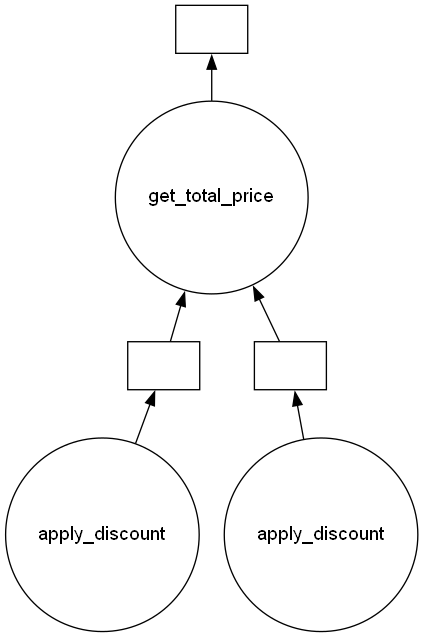

In [18]:
z.visualize()

In [19]:
%%time
z.compute()

CPU times: total: 0 ns
Wall time: 17 s


Example-2 Parallelizing a for loop with Dask

In [20]:
# Functions to perform mathematics operations

def square(x):
    return x*x

def double(x):
    return x*2

def add(x, y):
    return x + y

In [21]:
%%time
op= []
for i in range(600):
    a= square(i)
    b= double(i)
    c= add(a,b)
    op.append(c)
tot= sum(op)

CPU times: total: 0 ns
Wall time: 997 µs


In [22]:
%%time
# For loop that calls the above functions for each data
output = []
for i in range(6):
    a = delayed(square)(i)
    b = delayed(double)(i)
    c = delayed(add)(a, b)
    output.append(c)

total = delayed(sum)(output)

CPU times: total: 0 ns
Wall time: 4 ms


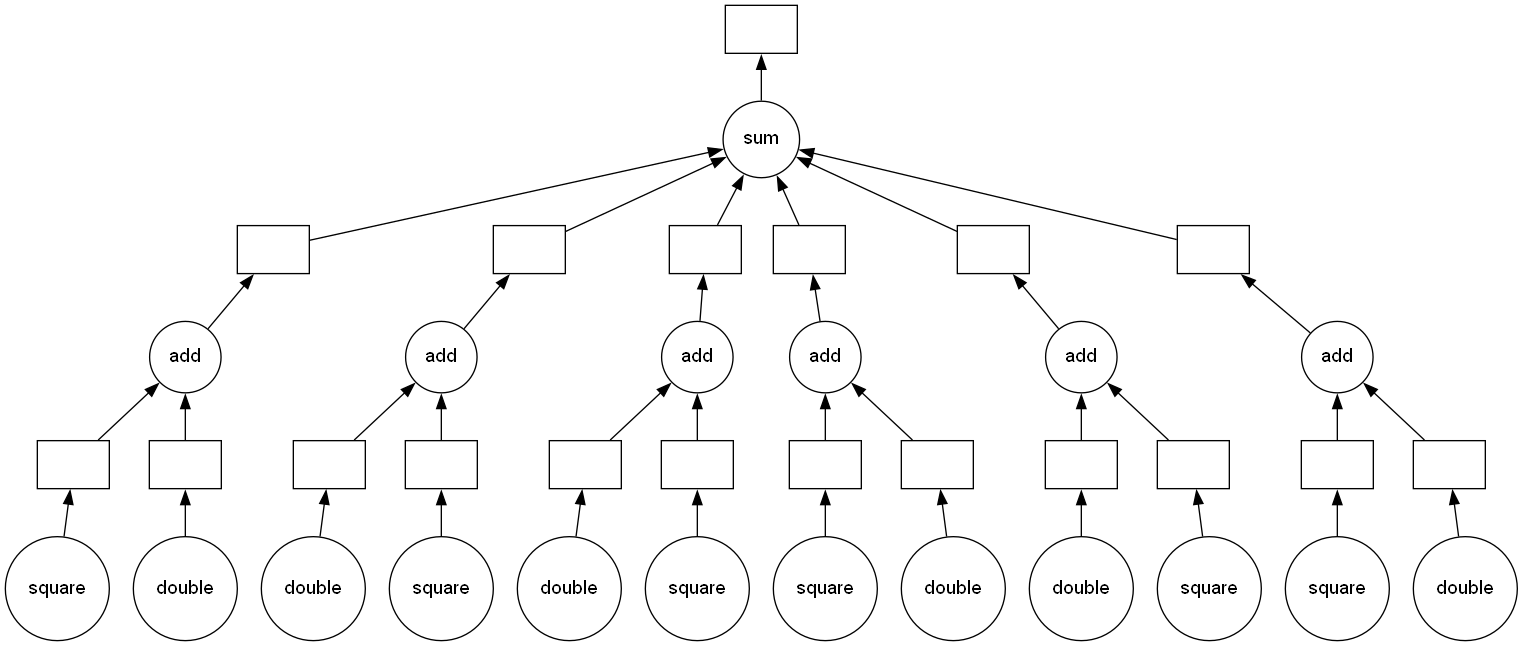

In [23]:

# Visualizing the task graph for the problem
total.visualize()

In [24]:
%%time
total.execute()

CPU times: total: 0 ns
Wall time: 1 ms


Delayed('execute-4b34864a-e838-46b8-8c4f-966f82e2fb34')

In [25]:
# Functions to perform mathematics operations
@delayed
def square(x):
    return x*x
@delayed
def double(x):
    return x*2
@delayed
def add(x, y):
    return x + y

In [26]:
%%time
op= []
for i in range(600):
    a= square(i)
    b= double(i)
    c= add(a,b)
    op.append(c)
tot= sum(op)

CPU times: total: 812 ms
Wall time: 785 ms


<h1>Dealing with larger-than-memory datasets</h1>

Dask Datasets

In [27]:
import dask.datasets as dd

In [28]:
df= dd.timeseries()

In [29]:
print('Total Rows Created in the dataset::',len(df))
df

Total Rows Created in the dataset:: 2592000


,name,id,x,y
npartitions=30,,,,
2000-01-01,object,int32,float64,float64
2000-01-02,...,...,...,...
...,...,...,...,...
2000-01-30,...,...,...,...
2000-01-31,...,...,...,...


In [30]:
df= df.persist()

In [31]:
df1= df.groupby('name').id

In [32]:
df2=df.groupby('name').std()

In [33]:
df['id']

Dask Series Structure:
npartitions=30
2000-01-01    int32
2000-01-02      ...
              ...  
2000-01-30      ...
2000-01-31      ...
Name: id, dtype: int32
Dask Name: getitem, 2 graph layers

In [34]:
df1

<h3>Dask Bags</h3>

Creation

In [35]:
import dask
from dask import delayed

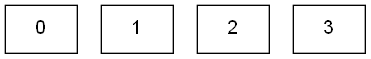

In [36]:
bag1= dask.bag.from_sequence([1,2,3,4,5,6,7,8],partition_size=2)
bag1.visualize()

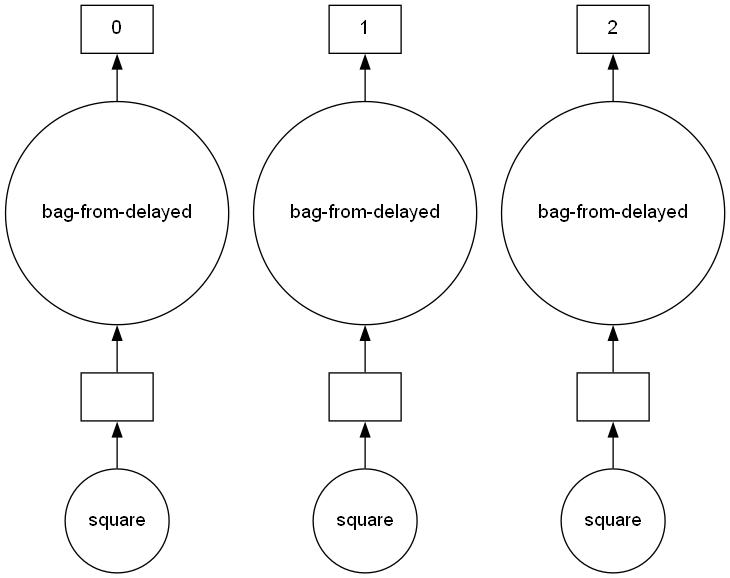

In [37]:
x, y, z =[delayed(square)(fn) for fn in range(3)]
bag2= dask.bag.from_delayed([x,y,z])
bag2.visualize()

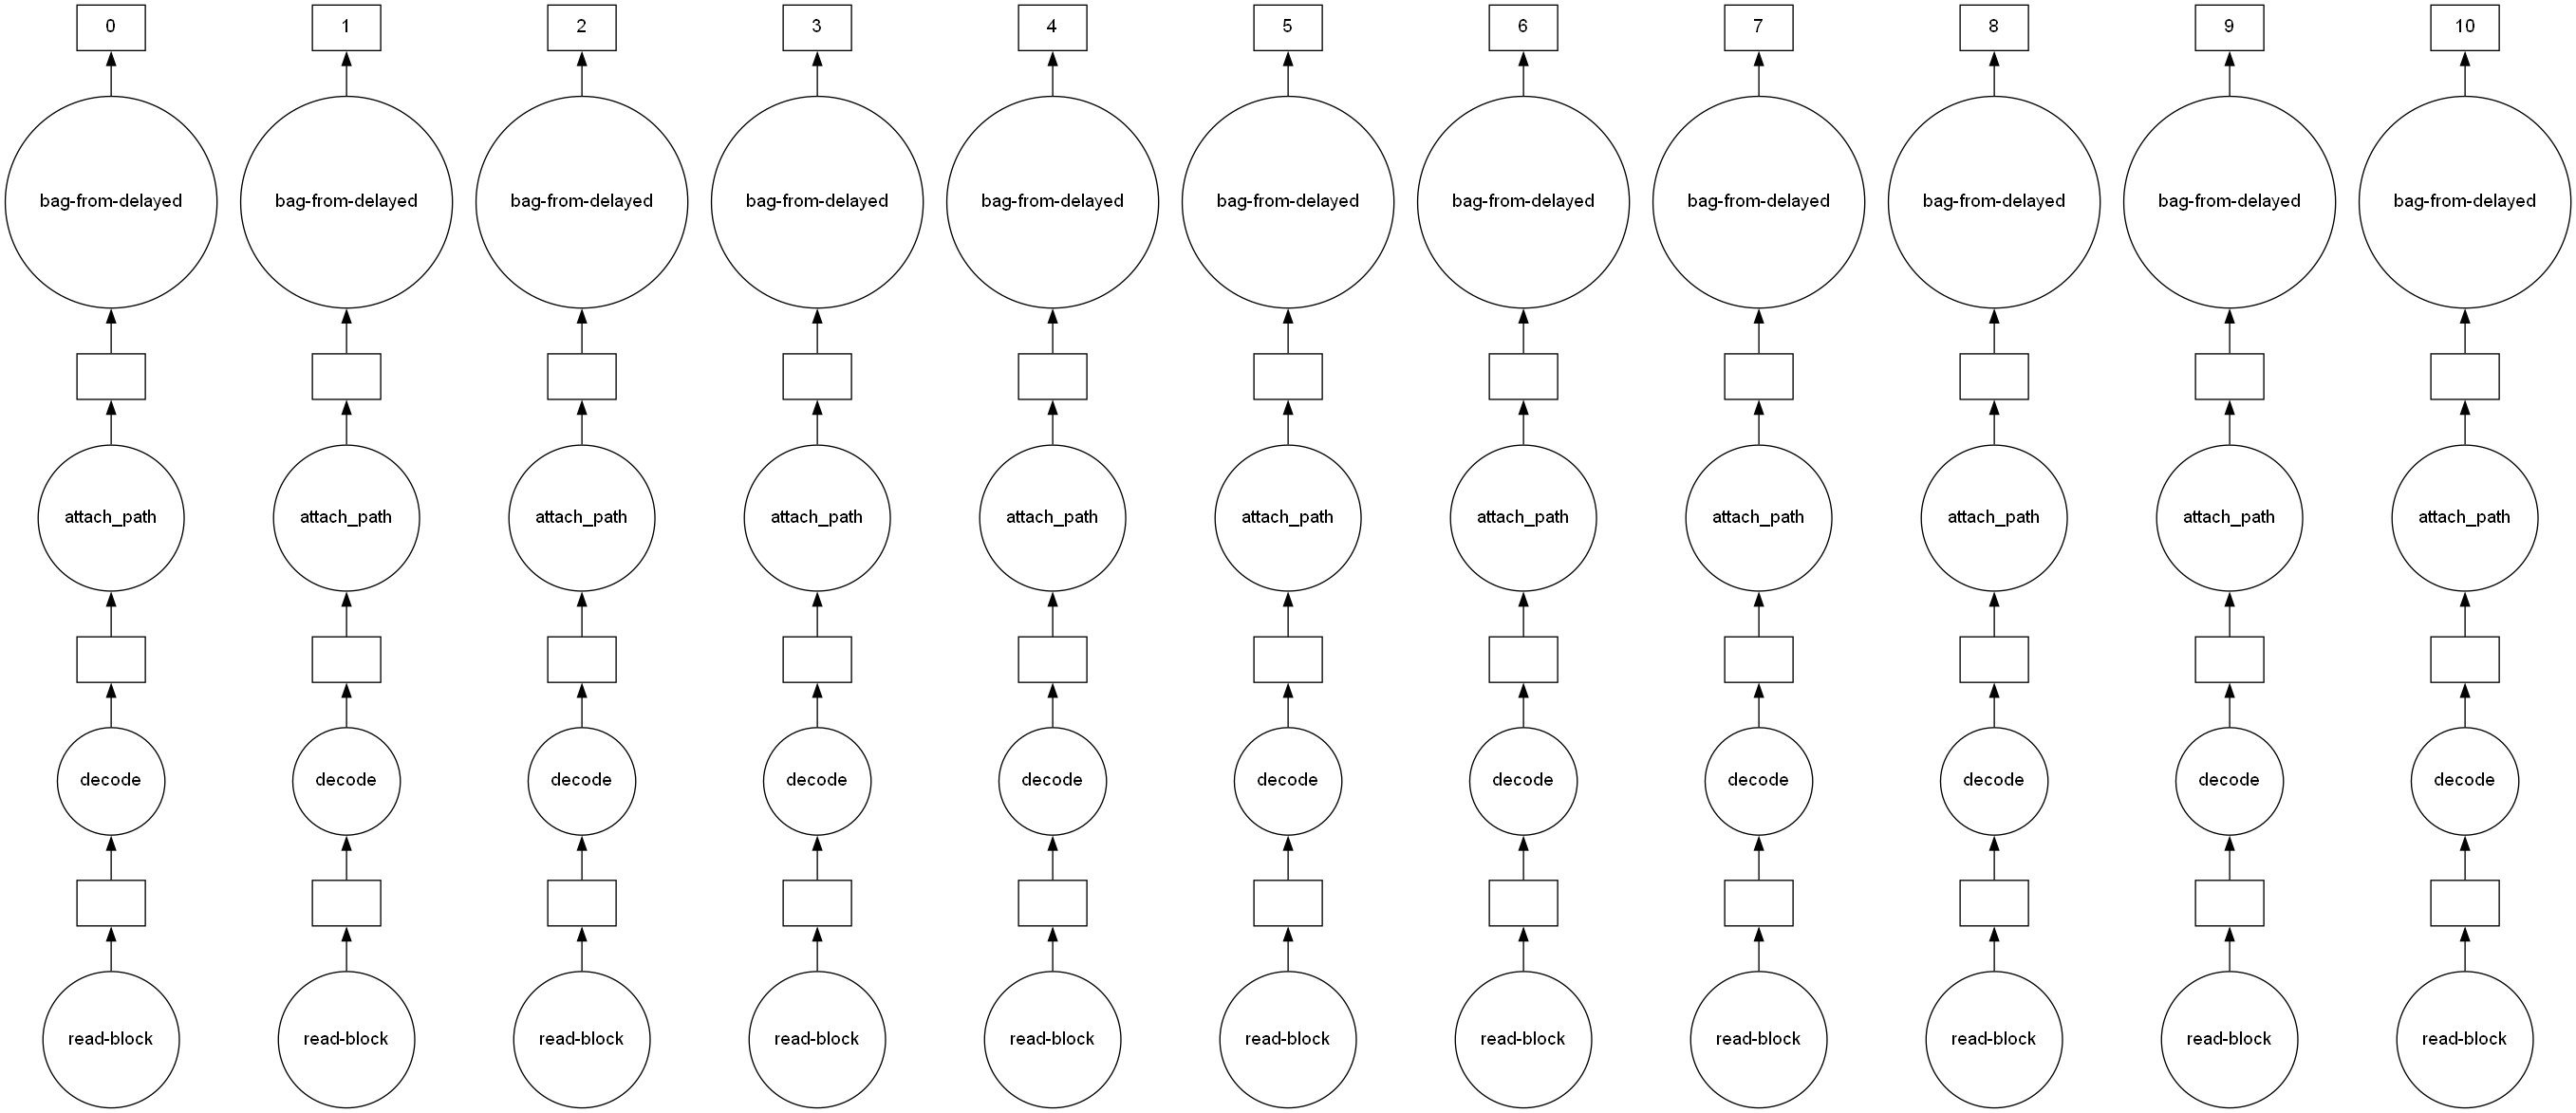

In [42]:
bag3= dask.bag.read_text(urlpath='../../../Automated_NLP_Based_Data_Handler/datasets/Aditya/TextEvidence/news1.txt',blocksize=200,include_path=True)
bag3.visualize()

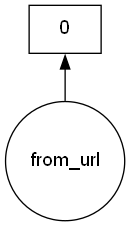

In [43]:
bag4= dask.bag.from_url('http://google.com')
bag4.visualize()

Operations on Dask Bags

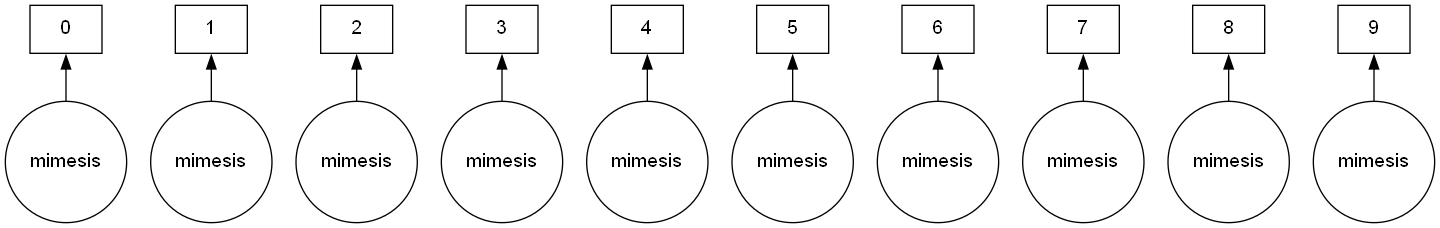

In [47]:
people= dd.make_people()
people.visualize()

How to write the data in my_bag (of 10 partitions) into 10 JSON files and store them?

In [50]:
import json

In [51]:
people.map(json.dumps).to_textfiles('./data/*.json')

['d:/aditya/Final Year/Project Work/Automated_NLP_Based_Data_Handler/personalTests/DaskWithParquet/data/0.json',
 'd:/aditya/Final Year/Project Work/Automated_NLP_Based_Data_Handler/personalTests/DaskWithParquet/data/1.json',
 'd:/aditya/Final Year/Project Work/Automated_NLP_Based_Data_Handler/personalTests/DaskWithParquet/data/2.json',
 'd:/aditya/Final Year/Project Work/Automated_NLP_Based_Data_Handler/personalTests/DaskWithParquet/data/3.json',
 'd:/aditya/Final Year/Project Work/Automated_NLP_Based_Data_Handler/personalTests/DaskWithParquet/data/4.json',
 'd:/aditya/Final Year/Project Work/Automated_NLP_Based_Data_Handler/personalTests/DaskWithParquet/data/5.json',
 'd:/aditya/Final Year/Project Work/Automated_NLP_Based_Data_Handler/personalTests/DaskWithParquet/data/6.json',
 'd:/aditya/Final Year/Project Work/Automated_NLP_Based_Data_Handler/personalTests/DaskWithParquet/data/7.json',
 'd:/aditya/Final Year/Project Work/Automated_NLP_Based_Data_Handler/personalTests/DaskWithParqu

In [55]:
people.take(4)

({'age': 61,
  'name': ('My', 'English'),
  'occupation': 'Instructor',
  'telephone': '+1-(785)-779-3801',
  'address': {'address': '557 Nueva Junction', 'city': 'Denver'},
  'credit-card': {'number': '3764 378289 17674', 'expiration-date': '01/19'}},
 {'age': 30,
  'name': ('Kathyrn', 'Maddox'),
  'occupation': 'Technical Advisor',
  'telephone': '(139) 180-3317',
  'address': {'address': '1322 Santa Monica Turnpike', 'city': 'Shoreview'},
  'credit-card': {'number': '4395 3448 7941 1517',
   'expiration-date': '02/17'}},
 {'age': 34,
  'name': ('Delbert', 'Washington'),
  'occupation': 'Telecommunication',
  'telephone': '+1-(713)-618-8161',
  'address': {'address': '361 West Halleck Bypass', 'city': 'Vestavia Hills'},
  'credit-card': {'number': '2702 9543 2728 2690',
   'expiration-date': '11/18'}},
 {'age': 22,
  'name': ('Gwenda', 'Grimes'),
  'occupation': 'Circus Proprietor',
  'telephone': '(879) 614-5406',
  'address': {'address': '980 Northgate Spur', 'city': 'Agawam'},
  '

In [54]:
people.compute()

[{'age': 61,
  'name': ('My', 'English'),
  'occupation': 'Instructor',
  'telephone': '+1-(785)-779-3801',
  'address': {'address': '557 Nueva Junction', 'city': 'Denver'},
  'credit-card': {'number': '3764 378289 17674', 'expiration-date': '01/19'}},
 {'age': 30,
  'name': ('Kathyrn', 'Maddox'),
  'occupation': 'Technical Advisor',
  'telephone': '(139) 180-3317',
  'address': {'address': '1322 Santa Monica Turnpike', 'city': 'Shoreview'},
  'credit-card': {'number': '4395 3448 7941 1517',
   'expiration-date': '02/17'}},
 {'age': 34,
  'name': ('Delbert', 'Washington'),
  'occupation': 'Telecommunication',
  'telephone': '+1-(713)-618-8161',
  'address': {'address': '361 West Halleck Bypass', 'city': 'Vestavia Hills'},
  'credit-card': {'number': '2702 9543 2728 2690',
   'expiration-date': '11/18'}},
 {'age': 22,
  'name': ('Gwenda', 'Grimes'),
  'occupation': 'Circus Proprietor',
  'telephone': '(879) 614-5406',
  'address': {'address': '980 Northgate Spur', 'city': 'Agawam'},
  '

To perform filter operations based on certain conditions

In [58]:
people.filter(lambda record: record['age']>60).count().compute()

1137

To perform groupby operation

In [60]:
people.groupby(lambda record: record['age']%2==0).count().compute()

2

Chain Computation

In [61]:
result = (people.filter(lambda record: record['age'] > 60)
           .map(lambda record: record['occupation'])
           .frequencies(sort=True)
           .topk(10, key=1))
result.compute()

[('Vicar', 9),
 ('Forest Ranger', 5),
 ('Hospital Worker', 5),
 ('Van Driver', 4),
 ('Hop Merchant', 4),
 ('Stone Sawyer', 4),
 ('Butcher', 4),
 ('Publishing Manager', 4),
 ('Milklady', 4),
 ('Literary Editor', 4)]